<a href="https://colab.research.google.com/github/skozh/ADA1/blob/master/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vector Operations

In [1]:
import numpy as np
import time

In [2]:
# Bubble Sort Algorithm

def bubbleSort(arr): 
    n = len(arr) 

    for i in range(n-1): 
        for j in range(0, n-i-1): 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 
    return arr

In [3]:
# Polynomial evaluation direct method

def polyvalDirect(arr, p):
  total = 0
  for index, val in enumerate(arr):
    total += val*(p**index)
  return total

In [4]:
# Generate random vector of size 2000

def generate_rv(arr):
    return np.random.uniform(1, 100, size=(arr))


# Select operation

def fun_operation(v, n):
    if n==0:
        return 5
    elif n==1:
        return np.add.reduce(v)
    elif n==2:
        return np.multiply.reduce(v)
    elif n==3:
        return bubbleSort(v)
    elif n==4:
        return np.sort(v, kind='quicksort')
    elif n==5:
        return np.sort(v, kind='mergesort') # timsort
    elif n==6:
        return np.polyval(v, 1.5)  # Horner's method
    elif n==7:
        return polyvalDirect(v, 1.5)
    else:
        return None

In [5]:
time_averages = np.zeros((5, 8))

for run in range(5):
    time_elapsed = np.zeros((8, 2000))

    for n in range(2000):
        v = generate_rv(arr=100)

        for op in range(8):
            start_time = time.time()
            y = fun_operation(v, op)
            time_elapsed[op][n] = (time.time() - start_time)

    time_averages[run] = (np.mean(time_elapsed, axis=1))

In [6]:
from tabulate import tabulate
headers = ['Constant','Sum','Product','Bubble Sort','Quick Sort','Tim Sort','Polyval-Horners', 'Polyval-Direct']
table = tabulate(time_averages, headers, tablefmt='psql')
print(table)

+-------------+-------------+-------------+---------------+--------------+-------------+-------------------+------------------+
|    Constant |         Sum |     Product |   Bubble Sort |   Quick Sort |    Tim Sort |   Polyval-Horners |   Polyval-Direct |
|-------------+-------------+-------------+---------------+--------------+-------------+-------------------+------------------|
| 4.87685e-07 | 5.25224e-06 | 2.37525e-06 |    0.00272592 |  9.89842e-06 | 4.89795e-06 |       6.12613e-05 |      5.70425e-05 |
| 4.96864e-07 | 5.16021e-06 | 2.39599e-06 |    0.00275762 |  9.52077e-06 | 4.37963e-06 |       6.17331e-05 |      5.63439e-05 |
| 4.68254e-07 | 4.91261e-06 | 2.28763e-06 |    0.00271853 |  8.79359e-06 | 3.90077e-06 |       5.92712e-05 |      5.59542e-05 |
| 4.86255e-07 | 5.14567e-06 | 2.30849e-06 |    0.00270424 |  9.09805e-06 | 3.97146e-06 |       5.97622e-05 |      5.62253e-05 |
| 4.63486e-07 | 4.96733e-06 | 2.27308e-06 |    0.00269757 |  9.12142e-06 | 3.90613e-06 |       5.93408e-

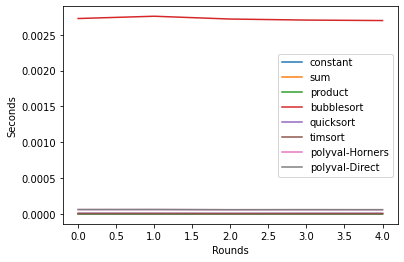

In [7]:
from matplotlib import pyplot as plt
time_avgs = time_averages.transpose()
plt.plot(time_avgs[0], label='constant')
plt.plot(time_avgs[1], label='sum')
plt.plot(time_avgs[2], label='product')
plt.plot(time_avgs[3], label='bubblesort')
plt.plot(time_avgs[4], label='quicksort')
plt.plot(time_avgs[5], label='timsort')
plt.plot(time_avgs[6], label='polyval-Horners')
plt.plot(time_avgs[6], label='polyval-Direct')
plt.xlabel('Rounds')
plt.ylabel('Seconds')
plt.legend()
plt.show()

## Matrix Operations

In [8]:
def generate_matrix(arr):
    return np.random.rand(arr, arr)

In [9]:
mat_time_averages = np.zeros(5)

for run in range(5):
    mat_time_elapsed = np.zeros(2000)
    for n in range(2000):
        A = generate_matrix(arr=100)
        B = generate_matrix(arr=100)

        start_time = time.time()
        y = np.matmul(A, B)
        mat_time_elapsed[n] = (time.time() - start_time)
        
    mat_time_averages[run] = np.mean(mat_time_elapsed)

In [10]:
mat_time_averages

array([0.0001155 , 0.00011527, 0.00011329, 0.00010898, 0.00010678])